c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 121ms/step - accuracy: 0.7150 - loss: 0.8700 - val_accuracy: 0.9678 - val_loss: 0.1068
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.9423 - loss: 0.1923 - val_accuracy: 0.9808 - val_loss: 0.0655
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9598 - loss: 0.1365 - val_accuracy: 0.9842 - val_loss: 0.0534
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9670 - loss: 0.1057 - val_accuracy: 0.9837 - val_loss: 0.0559
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9722 - loss: 0.0918 - val_accuracy: 0.9883 - val_loss: 0.0433
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9848 - loss: 0.0443
Test accuracy: 0.987500011920929


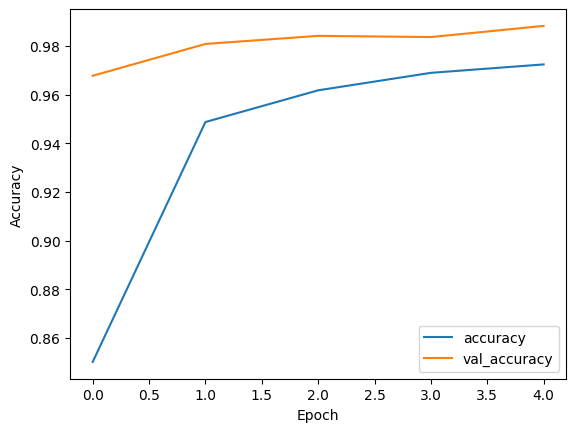

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
model.summary()

In [6]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
from PIL import Image

# Assuming 'image_path' is the path to your image file
image_path = r"photo-1484173936665-9ae90b911638.jpg"

# Open the image
image = Image.open(image_path)

# Resize the image to match the input shape of the model (28x28)
desired_size = (28, 28)
resized_image = image.resize(desired_size)

# Convert the image to grayscale if needed
resized_image = resized_image.convert('L')

# Convert the image to a numpy array
resized_array = np.array(resized_image)

# Normalize pixel values
resized_array = resized_array.astype('float32') / 255

# Add batch dimension
resized_array = np.expand_dims(resized_array, axis=0)

# Print the shape of the resized array (for verification)
print("Resized image shape:", resized_array.shape)

# Predict
predictions = model.predict(resized_array)

# Get the predicted class (index with the highest probability)
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)


Resized image shape: (1, 28, 28)
1/1 [==============================] - 0s 143ms/step
Predicted class: 5
